<a href="https://colab.research.google.com/github/sohangaonkar/medical-appointment-dataset-analysis/blob/main/medical_appointment_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# importing lib.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# getting the csv file directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Data Wrangling

In [2]:
# loading dataset from csv file and showing its first 5 rows
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No


In [3]:

# viewing main info about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32342 entries, 0 to 32341
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       32342 non-null  float64
 1   AppointmentID   32342 non-null  int64  
 2   Gender          32342 non-null  object 
 3   ScheduledDay    32342 non-null  object 
 4   AppointmentDay  32341 non-null  object 
 5   Age             32341 non-null  float64
 6   Neighbourhood   32341 non-null  object 
 7   Scholarship     32341 non-null  float64
 8   Hipertension    32341 non-null  float64
 9   Diabetes        32341 non-null  float64
 10  Alcoholism      32341 non-null  float64
 11  Handcap         32341 non-null  float64
 12  SMS_received    32341 non-null  float64
 13  No-show         32341 non-null  object 
dtypes: float64(8), int64(1), object(5)
memory usage: 3.5+ MB


In [4]:
# checking for duplicates
df.duplicated().sum()

np.int64(0)

In [5]:

# exploring the unique values of each column
df.nunique()

,0
PatientId,22020
AppointmentID,32342
Gender,2
ScheduledDay,31313
AppointmentDay,20
Age,99
Neighbourhood,79
Scholarship,2
Hipertension,2
Diabetes,2


In [6]:
# exploring handcap values
df['Handcap'].value_counts()

,count
Handcap,
0.0,31689
1.0,596
2.0,52
3.0,4


In [7]:
# exploring age column distribution
df['Age'].describe()

,Age
count,32341.000000
mean,36.833462
std,22.424906
min,0.000000
25%,18.000000
50%,37.000000
75%,54.000000
max,98.000000


Data Cleaning

In [8]:

# dropping columns and validating changes
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

In [11]:
df.AppointmentDay.unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z', nan], dtype=object)

In [12]:

# extracting only day, month and year values
df['ScheduledDay'] = df['ScheduledDay'].str[:10]
df['AppointmentDay'] = df['AppointmentDay'].str[:10]

# changing data type
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# confirming changes
print(df[['AppointmentDay', 'ScheduledDay']].dtypes)
df.head()

AppointmentDay    datetime64[ns]
ScheduledDay      datetime64[ns]
dtype: object


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,F,2016-04-29,2016-04-29,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No


In [13]:

# making new due days column
df['due-days'] = df['AppointmentDay'] - df['ScheduledDay']

# converting data type
df['due-days'] = df['due-days'].dt.days

# drop sch and appoint col
df.drop(['AppointmentDay', 'ScheduledDay'], axis = 1, inplace = True)

In [14]:

# viewing summery statistics
df['due-days'].describe()

,due-days
count,32341.000000
mean,9.345568
std,14.207966
min,-1.000000
25%,0.000000
50%,4.000000
75%,13.000000
max,176.000000


In [15]:
# viewing negative days values
df[df['due-days'] < 0 ]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
27033,M,38.0,RESISTÊNCIA,0.0,0.0,0.0,0.0,1.0,0.0,Yes,-1.0


In [16]:

# dropping these values and confirming changes
df.drop(df[df['due-days'] < 0].index, inplace = True)
df['due-days'].describe()

,due-days
count,32340.000000
mean,9.345887
std,14.208069
min,0.000000
25%,0.000000
50%,4.000000
75%,13.000000
max,176.000000


In [17]:
# converting column and confirming changes
df['Gender'] = df['Gender'].astype('category')

df['Gender'].dtypes

CategoricalDtype(categories=['F', 'M'], ordered=False, categories_dtype=object)

In [18]:

# converting columns to bool and confirming changes
cols = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received']
df[cols] = df[cols].astype('bool')
df[cols].dtypes

,0
Scholarship,bool
Hipertension,bool
Diabetes,bool
Alcoholism,bool
SMS_received,bool


In [19]:

# mapping alues to be more familiar
df.loc[df['No-show'] == 'Yes', 'No-show'] = 0
df.loc[df['No-show'] == 'No', 'No-show'] = 1

# casting dt type and confirming changes
df['No-show'] = df['No-show'].astype(bool)
df['No-show'].dtypes

dtype('bool')

In [20]:

# viewing rows with values of handcap > 1
df[df['Handcap'] > 1]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
946,M,94.0,BELA VISTA,False,True,True,False,2.0,True,True,15.0
1665,M,64.0,SANTA MARTHA,False,True,False,True,2.0,True,True,30.0
1666,M,64.0,SANTA MARTHA,False,True,False,True,2.0,False,True,30.0
2071,M,64.0,SANTA MARTHA,False,True,False,True,2.0,False,True,0.0
2091,F,11.0,ANDORINHAS,False,False,False,False,2.0,False,True,0.0
2213,F,29.0,VILA RUBIM,False,False,False,False,2.0,False,True,0.0
2214,M,55.0,DO QUADRO,False,False,False,False,3.0,False,True,0.0
2673,M,17.0,SANTA TEREZA,False,False,False,False,2.0,True,True,14.0
5424,M,65.0,SANTO ANDRÉ,False,True,True,True,2.0,False,False,2.0
5467,F,10.0,BENTO FERREIRA,False,False,False,False,2.0,False,True,4.0


In [21]:

# filling the bigger values with 1
df.loc[df['Handcap'].isin([2, 3, 4]), 'Handcap'] = 1

# casting type and confirming changes
df['Handcap'] = df['Handcap'].astype('bool')
df['Handcap'].unique()

array([False,  True])

In [22]:
#exploring values below 0
df[df['Age'] < 0]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days


In [23]:

# dropping row with negative age and confirming changes
df.drop(df[df['Age'] < 0].index, inplace = True)
df[df['Age'] < 0]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days


In [24]:
df.head()


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
0,F,62.0,JARDIM DA PENHA,False,True,False,False,False,False,True,0.0
1,M,56.0,JARDIM DA PENHA,False,False,False,False,False,False,True,0.0
2,F,62.0,MATA DA PRAIA,False,False,False,False,False,False,True,0.0
3,F,8.0,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0.0
4,F,56.0,JARDIM DA PENHA,False,True,True,False,False,False,True,0.0


In [25]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32341 entries, 0 to 32341
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Gender         32341 non-null  category
 1   Age            32340 non-null  float64 
 2   Neighbourhood  32340 non-null  object  
 3   Scholarship    32341 non-null  bool    
 4   Hipertension   32341 non-null  bool    
 5   Diabetes       32341 non-null  bool    
 6   Alcoholism     32341 non-null  bool    
 7   Handcap        32341 non-null  bool    
 8   SMS_received   32341 non-null  bool    
 9   No-show        32341 non-null  bool    
 10  due-days       32340 non-null  float64 
dtypes: bool(7), category(1), float64(2), object(1)
memory usage: 1.2+ MB



Data Visualization and EDA

In [26]:

# setting seaborn configurations
sns.set_style("whitegrid")

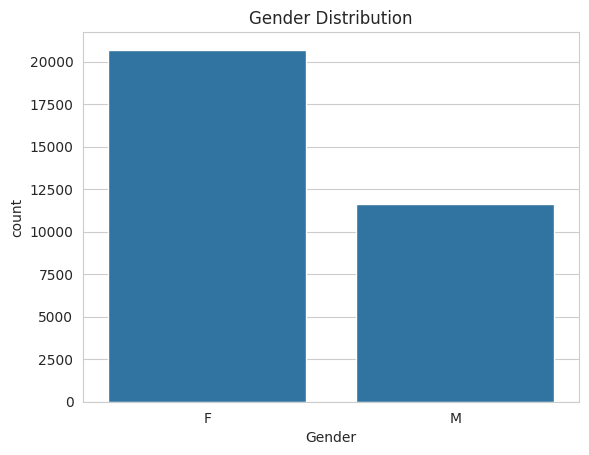

In [27]:

# viewing count plot of gender distribution in our dataset
sns.countplot(x = 'Gender', data = df)
plt.title("Gender Distribution")
plt.show()

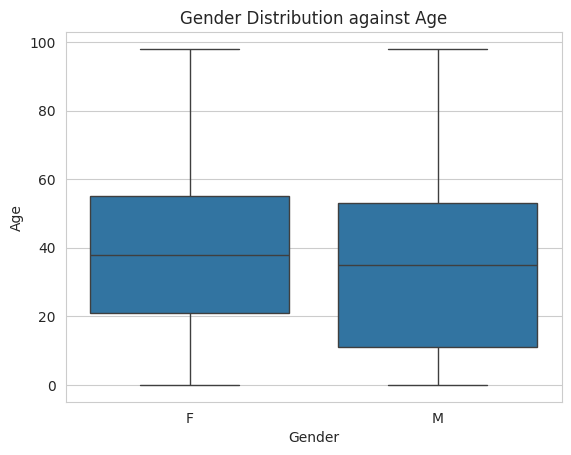

In [28]:
# viewing count plot of gender distribution against age in our dataset
sns.boxplot(x = 'Gender', y = 'Age', data = df)
plt.title("Gender Distribution against Age")
plt.show()

In [29]:

df['No-show'].value_counts()

,count
No-show,
True,25642
False,6699


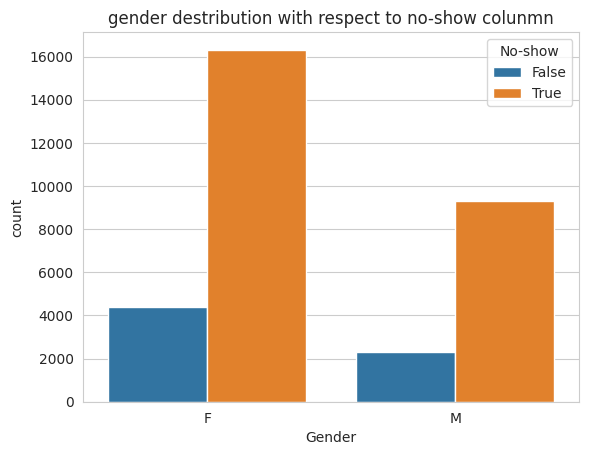

In [30]:
# showing the gender destribution with respect to the no-show colunmn
sns.countplot(x = 'Gender', data = df, hue = 'No-show')
plt.title('gender destribution with respect to no-show colunmn')
plt.show()

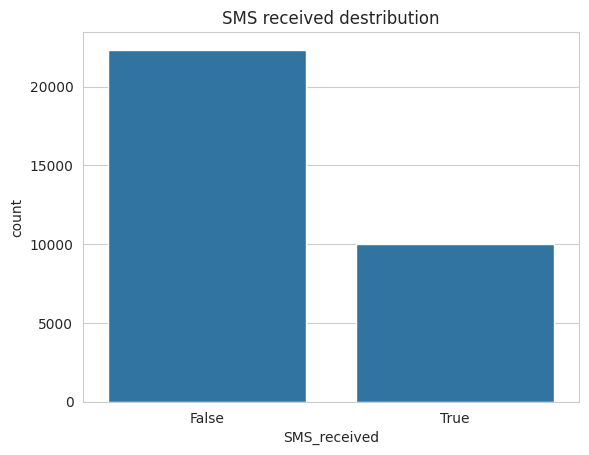

In [31]:
# viewing count plot of recieving SMS distribution in our dataset
sns.countplot(x = 'SMS_received', data = df)
plt.title("SMS received destribution")
plt.show()

In [32]:
df['SMS_received'].value_counts()

,count
SMS_received,
False,22352
True,9989


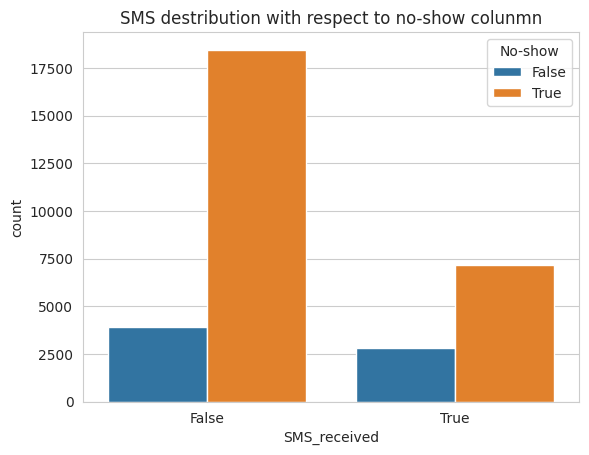

In [33]:

# showing the sms destribution with respect to the no-show colunmn
sns.countplot(x = 'SMS_received', data = df, hue = 'No-show')
plt.title('SMS destribution with respect to no-show colunmn')
plt.show()

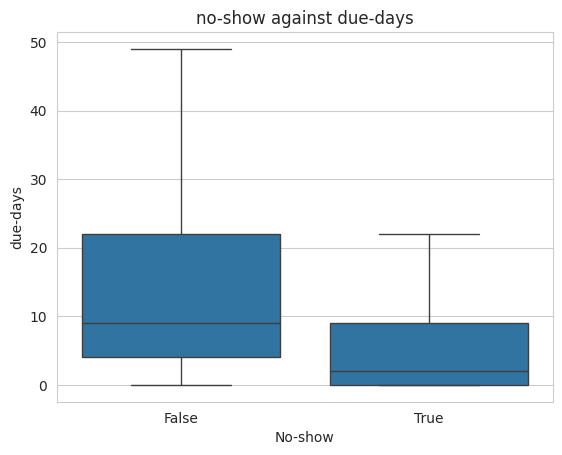

In [34]:
# viewing the correlation between no-show and due-days without outliers
sns.boxplot(x = 'No-show', y = 'due-days', data = df, showfliers = False)
plt.title('no-show against due-days')
plt.show()

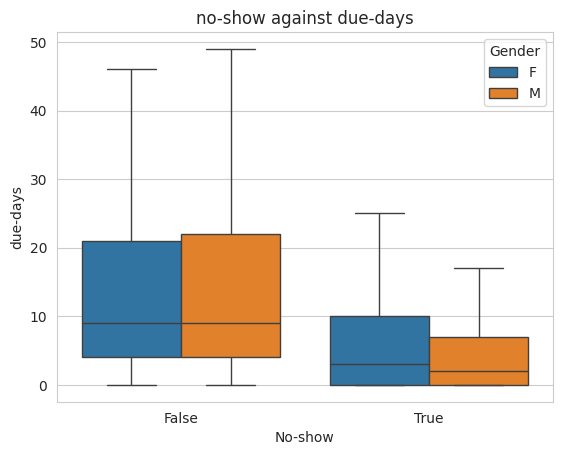

In [35]:
# viewing the correlation between no-show and due-days without outliers with respect to gender
sns.boxplot(x = 'No-show', y = 'due-days', data = df, hue = 'Gender', showfliers = False)
plt.title('no-show against due-days')
plt.show()

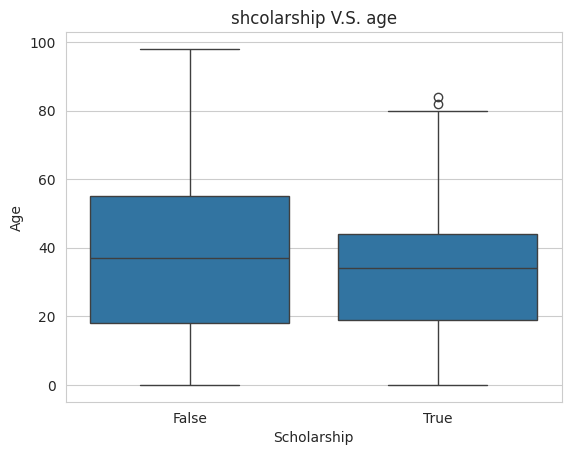

In [36]:

# plotting having a scholarship against age
sns.boxplot(x = 'Scholarship', y = 'Age', data = df)
plt.title('shcolarship V.S. age')
plt.show()

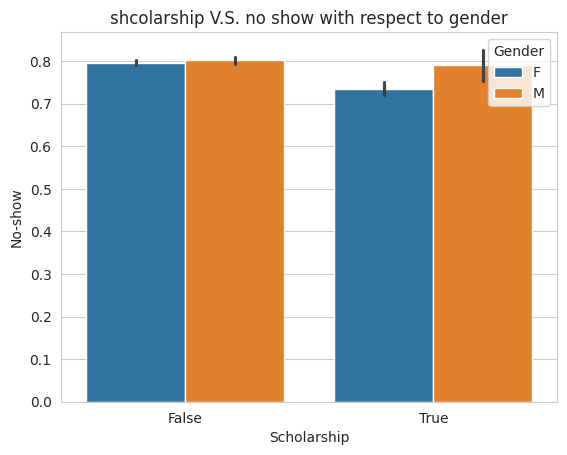

In [37]:
# plotting having a scholarship against no show with respect to gender
sns.barplot(x = 'Scholarship', y = 'No-show', hue = 'Gender', data = df)
plt.title('shcolarship V.S. no show with respect to gender')
plt.show()

<Axes: >

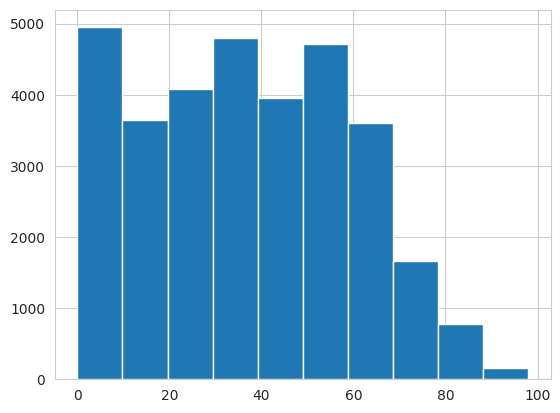

In [38]:

# ploting age destribution
df['Age'].hist()

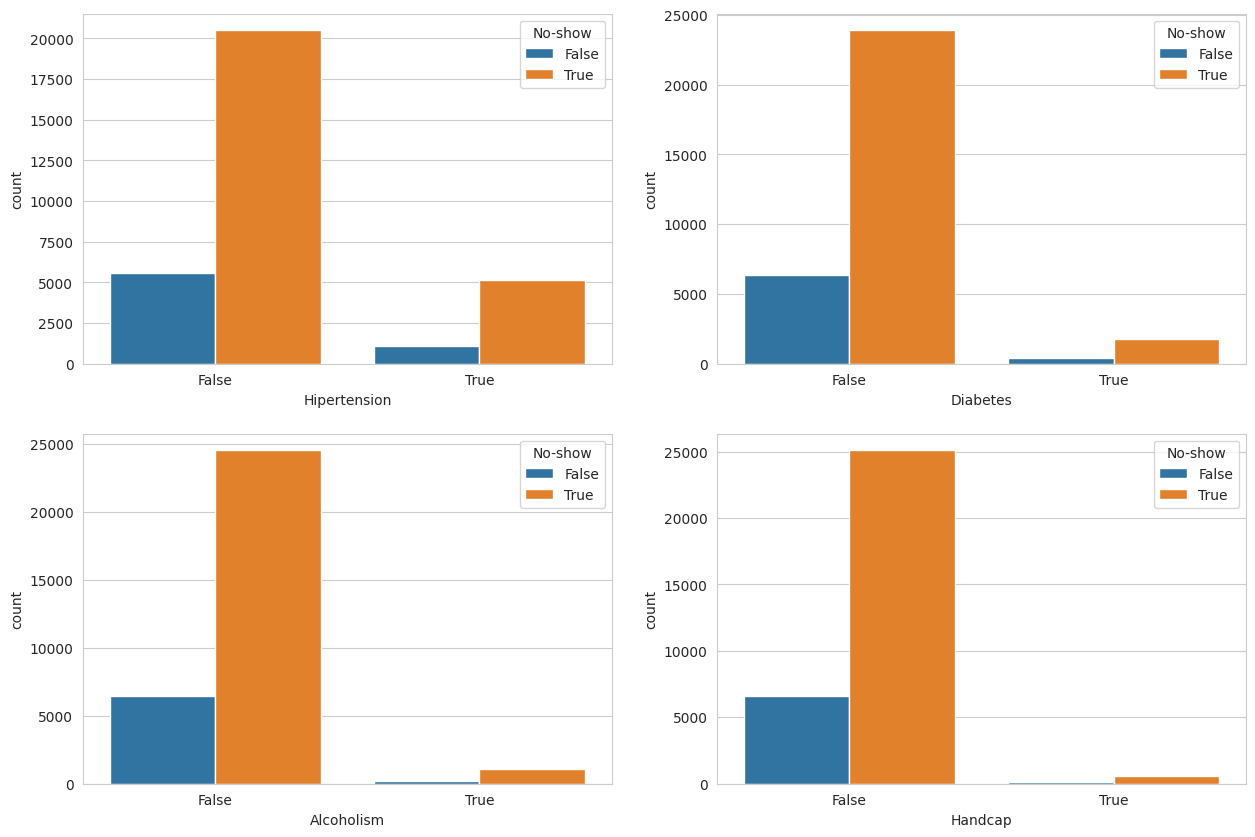

In [39]:

# plotting deseases against no show
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x = 'Hipertension', data = df, hue= 'No-show')
plt.subplot(2,2,2)
sns.countplot(x = 'Diabetes', data = df, hue= 'No-show')
plt.subplot(2,2,3)
sns.countplot(x = 'Alcoholism', data = df, hue= 'No-show')
plt.subplot(2,2,4)
sns.countplot(x = 'Handcap', data = df, hue= 'No-show')
plt.show()

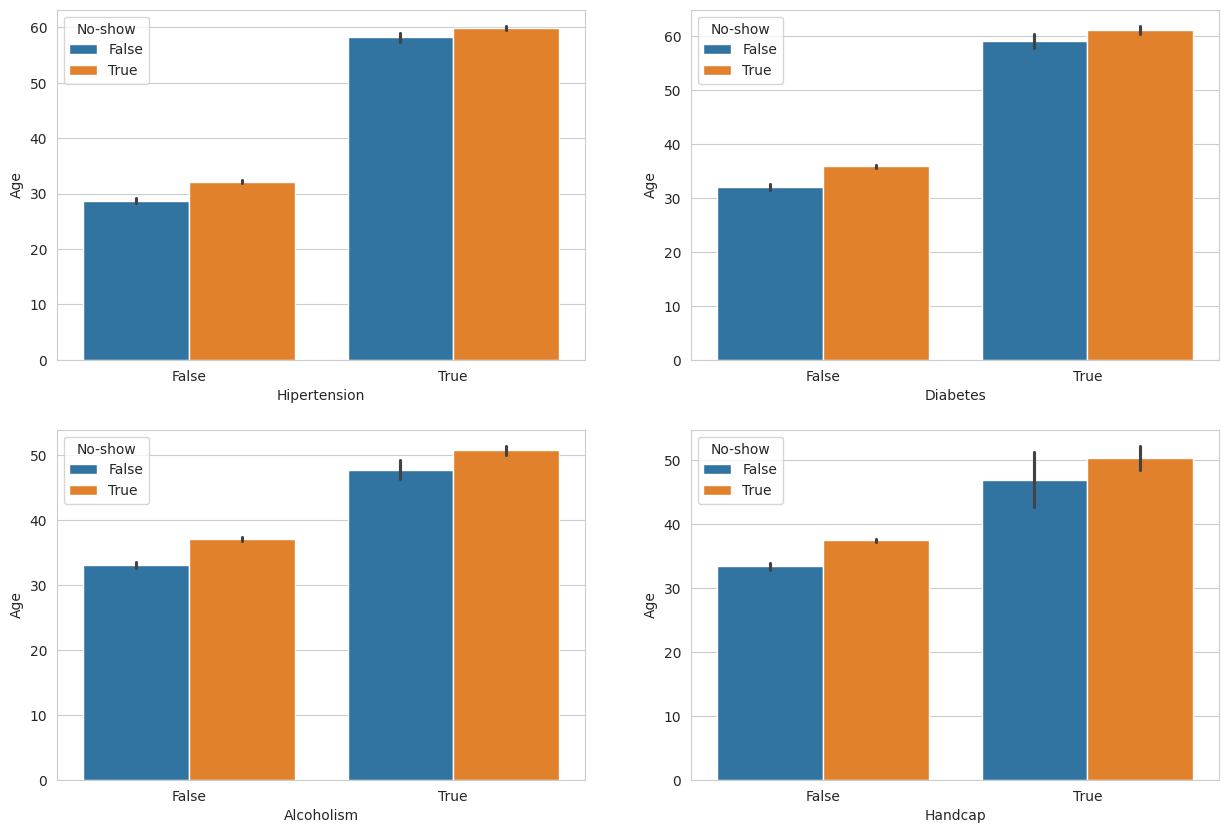

In [40]:

# plotting deseases against no show with respect to age
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = 'Hipertension', y = 'Age', data = df, hue= 'No-show')
plt.subplot(2,2,2)
sns.barplot(x = 'Diabetes', y = 'Age', data = df, hue= 'No-show')
plt.subplot(2,2,3)
sns.barplot(x = 'Alcoholism', y = 'Age', data = df, hue= 'No-show')
plt.subplot(2,2,4)
sns.barplot(x = 'Handcap', y = 'Age', data = df, hue= 'No-show')
plt.show()
